In [198]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [199]:
data = pd.read_excel("处理数据.xlsx")
data_gj = pd.read_excel("高钾玻璃.xlsx")
data_qb = pd.read_excel("铅钡玻璃.xlsx")

In [200]:
data = data.replace("无风化",0)
data = data.replace("风化",1)
data = data.replace("高钾",0)
data = data.replace("铅钡",1)

data_gj = data_gj.replace("无风化",0)
data_gj = data_gj.replace("风化",1)
data_qb = data_qb.replace("无风化",0)
data_qb = data_qb.replace("风化",1)

In [201]:
data_x = data.drop(data.columns[0],axis =1)
data_y = data.drop(data.columns[1:],axis =1)

X_train,X_test,y_train,y_test = train_test_split(data_x,data_y,random_state=2)

In [202]:
model_rf = RandomForestClassifier(random_state=9)
model_rf.fit(X_train,y_train)

expected = y_test
predicted = model_rf.predict(X_test)

print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        16

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

[[ 1  0]
 [ 0 16]]


C:\Users\zyaaa\AppData\Local\Temp/ipykernel_27208/3945645574.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train,y_train)


In [203]:
'''
from sklearn.ensemble import RandomForestClassifier
from IPython.core.display import HTML, display
from sklearn import tree
import pydotplus
import graphviz
Estimators = model_rf.estimators_
for index, model in enumerate(Estimators):
    filename =  'Estimators_' + str(index) + '.pdf'
    dot_data = tree.export_graphviz(model , out_file=None,
                         feature_names=X_train.columns,
                         class_names=pd.array(['高钾','铅钡']),
                         filled=True, rounded=True,
                         special_characters=True)
    dot_data = dot_data.replace('helvetica', '"Microsoft YaHei"')                   
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf(filename)
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom IPython.core.display import HTML, display\nfrom sklearn import tree\nimport pydotplus\nimport graphviz\nEstimators = model_rf.estimators_\nfor index, model in enumerate(Estimators):\n    filename =  \'Estimators_\' + str(index) + \'.pdf\'\n    dot_data = tree.export_graphviz(model , out_file=None,\n                         feature_names=X_train.columns,\n                         class_names=pd.array([\'高钾\',\'铅钡\']),\n                         filled=True, rounded=True,\n                         special_characters=True)\n    dot_data = dot_data.replace(\'helvetica\', \'"Microsoft YaHei"\')                   \n    graph = pydotplus.graph_from_dot_data(dot_data)\n    graph.write_pdf(filename)\n'

In [204]:
importance = model_rf.feature_importances_
feat_labels = data_x.columns[0:]

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题

#np.argsort()返回待排序集合从下到大的索引值，[::-1]实现倒序，即最终imp_result内保存的是从大到小的索引值
imp_result = np.argsort(importance)[::-1][:15]
jl_sst = pd.DataFrame(columns=["化学成分","重要性"])
#按重要性从高到低输出属性列名和其重要性
for i in range(len(imp_result)):
    jl_sst.loc[i,"化学成分"] = feat_labels[imp_result[i]]
    jl_sst.loc[i,"重要性"] = importance[imp_result[i]]
    print("%2d. %-*s %f" % (i + 1, 15, feat_labels[imp_result[i]], importance[imp_result[i]]))
 

 1. 氧化铅(PbO)        0.261471
 2. 氧化钡(BaO)        0.247121
 3. 二氧化硅(SiO2)      0.169023
 4. 氧化钾(K2O)        0.149290
 5. 五氧化二磷(P2O5)     0.034905
 6. 氧化铜(CuO)        0.029424
 7. 氧化铝(Al2O3)      0.026606
 8. 氧化锶(SrO)        0.024891
 9. 氧化铁(Fe2O3)      0.019397
10. 氧化钙(CaO)        0.014640
11. 表面风化            0.014497
12. 氧化镁(MgO)        0.005394
13. 氧化钠(Na2O)       0.001542
14. 二氧化硫(SO2)       0.001396
15. 氧化锡(SnO2)       0.000403


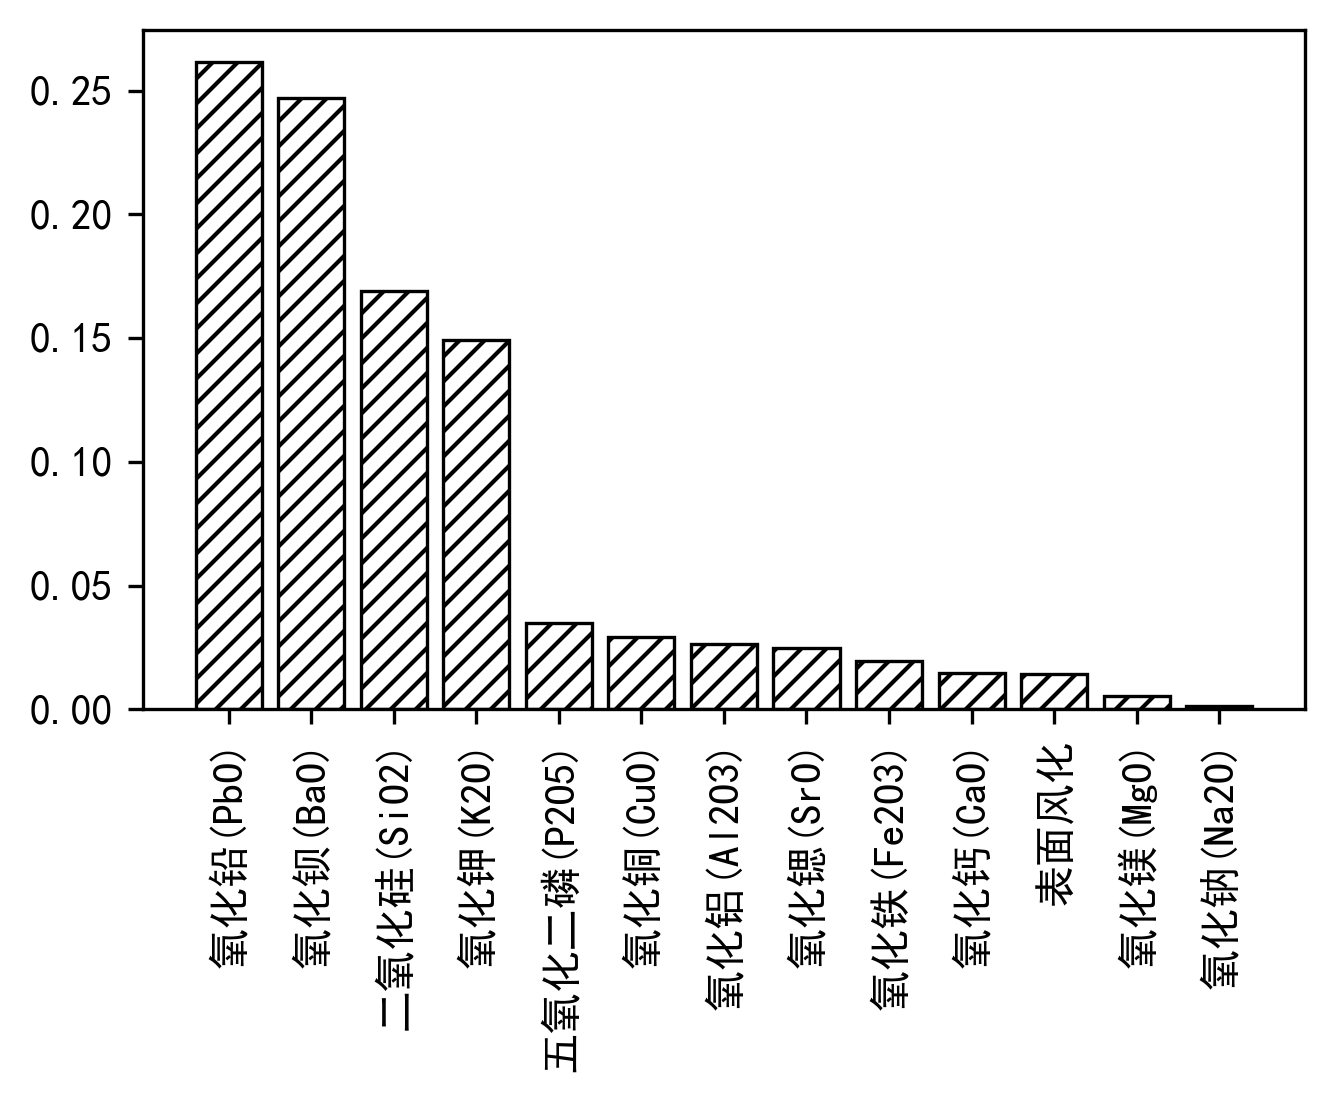

In [205]:
fig = plt.figure(dpi=300,figsize=(5,3))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
fig.patch.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
for i in range(13):
    plt.bar(jl_sst.loc[i,"化学成分"],jl_sst.loc[i,"重要性"],ec='k',color='white',
                lw=.8,hatch='////')
plt.xticks(rotation = 90)
plt.tick_params(axis='x',colors='black')
plt.tick_params(axis='y',colors='black')


In [206]:
data_gj_jl = data_gj[["氧化铅(PbO)","氧化钡(BaO)","二氧化硅(SiO2)","氧化钾(K2O)","五氧化二磷(P2O5)","氧化铜(CuO)"]]
data_qb_jl = data_qb[["氧化铅(PbO)","氧化钡(BaO)","二氧化硅(SiO2)","氧化钾(K2O)","五氧化二磷(P2O5)","氧化铜(CuO)"]]

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


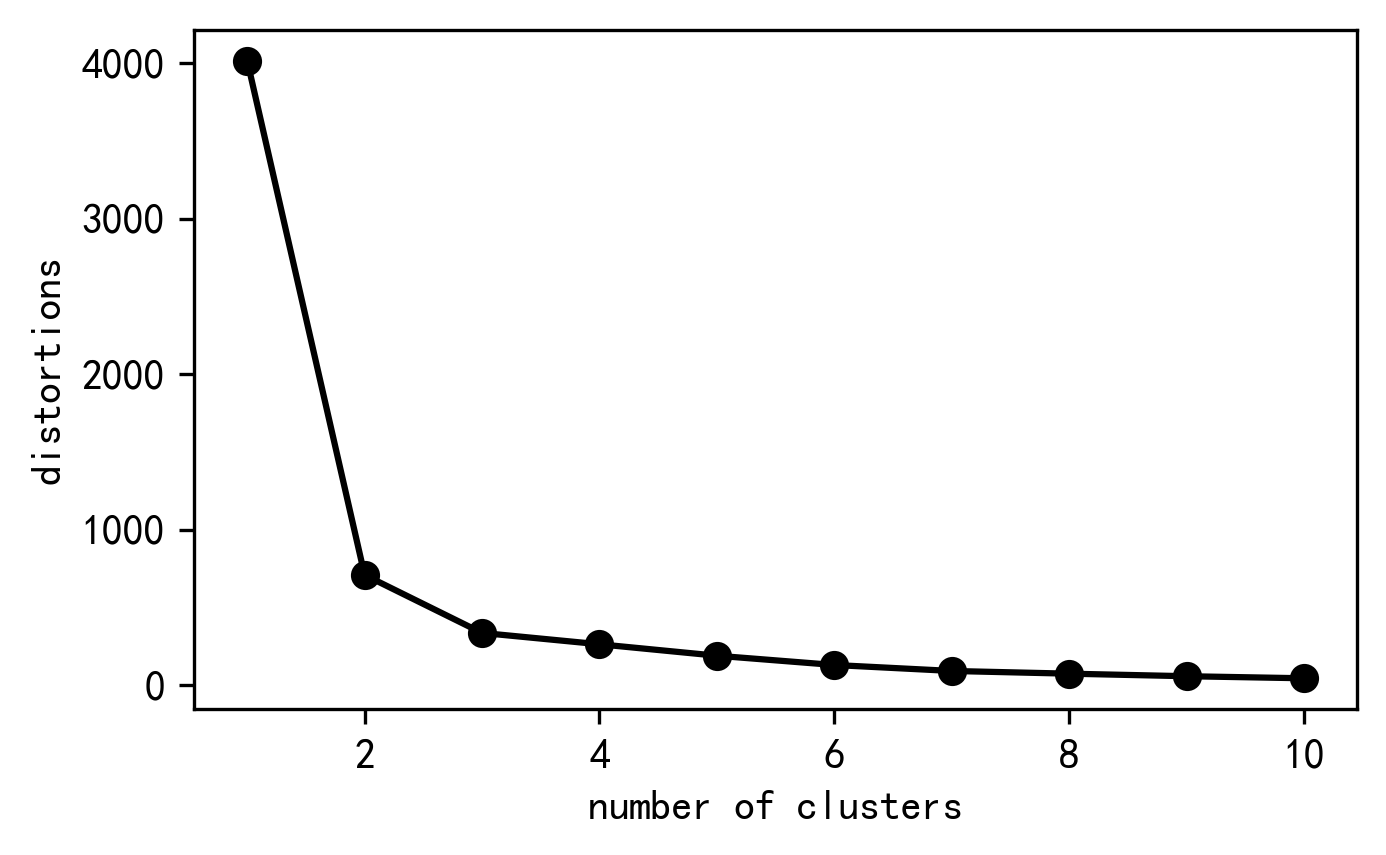

In [207]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

d=[]
for i in range(1,11):    #k取值1~11，做kmeans聚类，看不同k值对应的簇内误差平方和
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(data_gj_jl)
    d.append(km.inertia_)  #inertia簇内误差平方和

#绘图参数设置   
fig = plt.figure(dpi=300,figsize=(5,3)) #设置分辨率，画布大小
ax = fig.add_subplot(111)
#设置背景色
ax.patch.set_facecolor('white')#设置画布外颜色
fig.patch.set_facecolor('white')#设置画布内颜色
#设置画框的颜色
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

#作图
plt.plot(range(1,11),d,marker='o',color = 'black') 
plt.xlabel('number of clusters',color='black')
plt.ylabel('distortions',color='black')
#设置横纵坐标轴的颜色
plt.tick_params(axis='x',colors='black')
plt.tick_params(axis='y',colors='black')

#建立簇为3的聚类器
estimator_gj= KMeans(n_clusters=3,random_state=0)
estimator_gj.fit(data_gj_jl)
#获取标签
gj_yc = estimator_gj.labels_

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


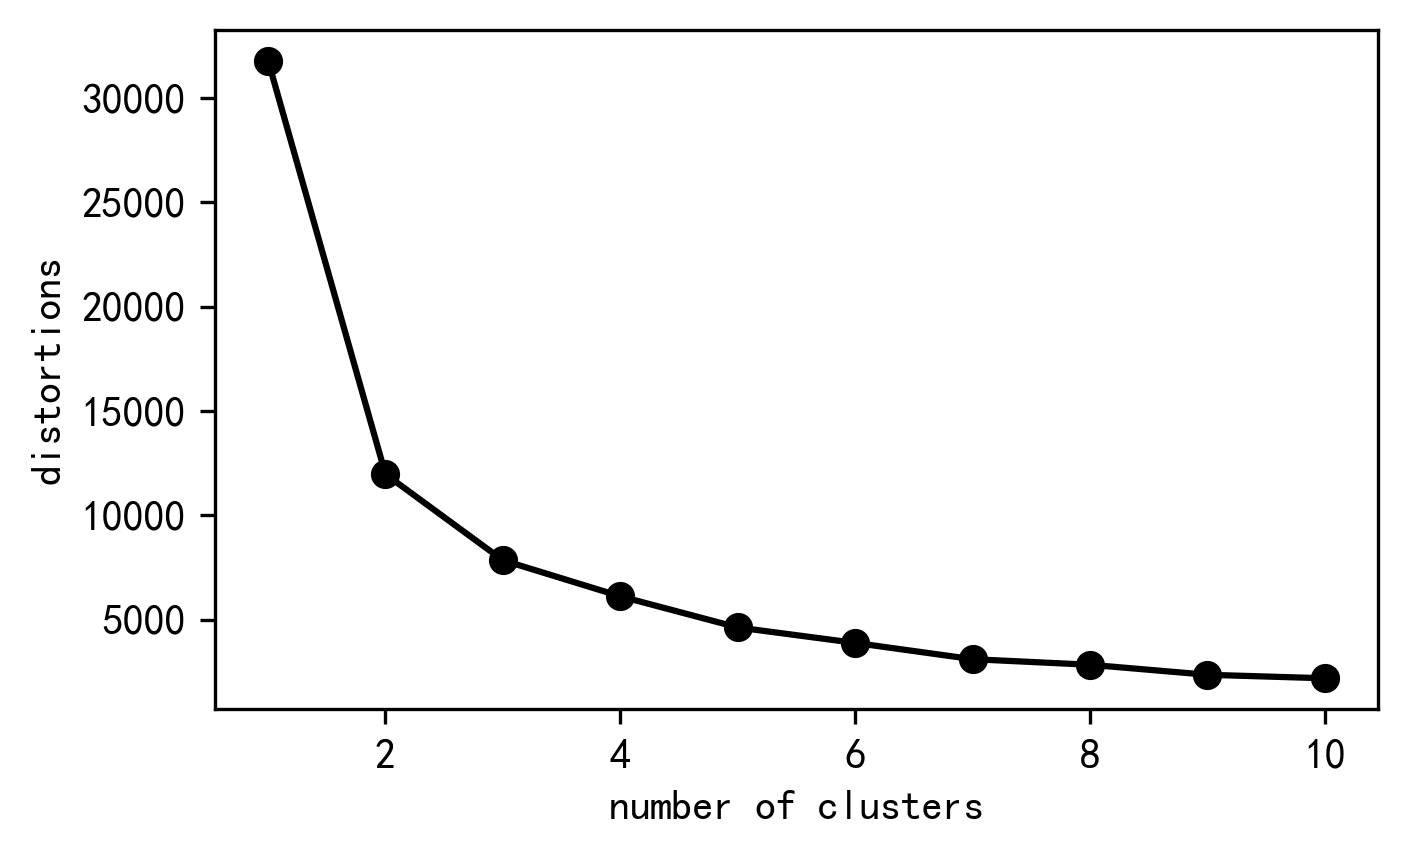

In [208]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

d=[]
for i in range(1,11):    #k取值1~11，做kmeans聚类，看不同k值对应的簇内误差平方和
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(data_qb_jl)
    d.append(km.inertia_)  #inertia簇内误差平方和
#绘图参数设置   
fig = plt.figure(dpi=300,figsize=(5,3)) #设置分辨率，画布大小
ax = fig.add_subplot(111)
#设置背景色
ax.patch.set_facecolor('white')#设置画布外颜色
fig.patch.set_facecolor('white')#设置画布内颜色
#设置画框的颜色
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

plt.plot(range(1,11),d,marker='o',color='black')
plt.xlabel('number of clusters',color='black')
plt.ylabel('distortions',color='black')
#设置横纵坐标轴的颜色
plt.tick_params(axis='x',colors='black')
plt.tick_params(axis='y',colors='black')

#建立簇为3的聚类器
estimator_qb = KMeans(n_clusters=3,random_state=0)
estimator_qb.fit(data_qb_jl)
#获取标签
qb_yc = estimator_qb.labels_

In [209]:
gj_yc = pd.DataFrame(gj_yc,columns=["分类值"])
data_gj_jl1 = pd.concat([data_gj_jl,gj_yc],axis=1)
qb_yc = pd.DataFrame(qb_yc,columns=["分类值"])
data_qb_jl1 = pd.concat([data_qb_jl,qb_yc],axis=1)

In [212]:
import random
import string

#5%扰动测试
data_gj_jl2 = data_gj_jl.copy()
a = random.sample(range(0,17),3)
b = random.sample(range(0,6),2)
for i in a:
    for j in b:
        data_gj_jl2.iloc[a,b] = data_gj_jl2.iloc[a,b] * random.choice([0.95,1.05])
        
#建立簇为3的聚类器
estimator_gj_t1 = KMeans(n_clusters=3,random_state=0)
estimator_gj_t1.fit(data_gj_jl2)
#获取标签
gj_yc_t1 = estimator_gj_t1.labels_
gj_yc_t1 = pd.DataFrame(gj_yc_t1,columns=["5%扰动测试"])
data_gj_jl1 = pd.concat([data_gj_jl1,gj_yc_t1],axis=1)

#10%扰动测试
data_gj_jl2 = data_gj_jl.copy()
a = random.sample(range(0,17),3)
b = random.sample(range(0,6),2)
for i in a:
    for j in b:
        data_gj_jl2.iloc[a,b] = data_gj_jl2.iloc[a,b] * random.choice([0.9,1.1])
        
#建立簇为3的聚类器
estimator_gj_t2 = KMeans(n_clusters=3,random_state=0)
estimator_gj_t2.fit(data_gj_jl2)
#获取标签
gj_yc_t2 = estimator_gj_t2.labels_
gj_yc_t2 = pd.DataFrame(gj_yc_t2,columns=["10%扰动测试"])
data_gj_jl1 = pd.concat([data_gj_jl1,gj_yc_t2],axis=1)

#15%扰动测试
data_gj_jl2 = data_gj_jl.copy()
a = random.sample(range(0,17),3)
b = random.sample(range(0,6),2)
for i in a:
    for j in b:
        data_gj_jl2.iloc[a,b] = data_gj_jl2.iloc[a,b] * random.choice([0.9,1.1])
        
#建立簇为3的聚类器
estimator_gj_t3 = KMeans(n_clusters=3,random_state=0)
estimator_gj_t3.fit(data_gj_jl2)
#获取标签
gj_yc_t3 = estimator_gj_t3.labels_
gj_yc_t3 = pd.DataFrame(gj_yc_t3,columns=["15%扰动测试"])
data_gj_jl1 = pd.concat([data_gj_jl1,gj_yc_t3],axis=1)

data_gj_jl1.to_excel("扰动高钾聚类.xlsx")

In [193]:
import random
import string

#5%扰动测试
data_qb_jl_t1 = data_qb_jl.copy()
a = random.sample(range(0,49),5)
b = random.sample(range(0,6),2)
for i in a:
    for j in b:
        data_qb_jl_t1.iloc[a,b] = data_qb_jl_t1.iloc[a,b] * random.choice([0.95,1.05])
        
#建立簇为3的聚类器
estimator_qb_t1 = KMeans(n_clusters=3,random_state=0)
estimator_qb_t1.fit(data_qb_jl_t1)
#获取标签
qb_yc_t1 = estimator_qb_t1.labels_
qb_yc_t1 = pd.DataFrame(qb_yc_t1,columns=["5%扰动测试"])
data_qb_jl1 = pd.concat([data_qb_jl1,qb_yc_t1],axis=1)

#10%扰动测试
data_qb_jl_t1 = data_qb_jl.copy()
a = random.sample(range(0,49),5)
b = random.sample(range(0,6),2)
for i in a:
    for j in b:
        data_qb_jl_t1.iloc[a,b] = data_qb_jl_t1.iloc[a,b] * random.choice([0.9,1.1])
        
#建立簇为3的聚类器
estimator_qb_t1 = KMeans(n_clusters=3,random_state=0)
estimator_qb_t1.fit(data_qb_jl_t1)
#获取标签
qb_yc_t1 = estimator_qb_t1.labels_
qb_yc_t1 = pd.DataFrame(qb_yc_t1,columns=["10%扰动测试"])
data_qb_jl1 = pd.concat([data_qb_jl1,qb_yc_t1],axis=1)

#15%扰动测试
data_qb_jl_t1 = data_qb_jl.copy()
a = random.sample(range(0,49),5)
b = random.sample(range(0,6),2)
for i in a:
    for j in b:
        data_qb_jl_t1.iloc[a,b] = data_qb_jl_t1.iloc[a,b] * random.choice([0.85,1.15])
        
#建立簇为3的聚类器
estimator_qb_t1 = KMeans(n_clusters=3,random_state=0)
estimator_qb_t1.fit(data_qb_jl_t1)
#获取标签
qb_yc_t1 = estimator_qb_t1.labels_
qb_yc_t1 = pd.DataFrame(qb_yc_t1,columns=["15%扰动测试"])
data_qb_jl1 = pd.concat([data_qb_jl1,qb_yc_t1],axis=1)

data_qb_jl1.to_excel("扰动铅钡聚类.xlsx")

[13, 43, 8, 47, 27]
[5, 1]


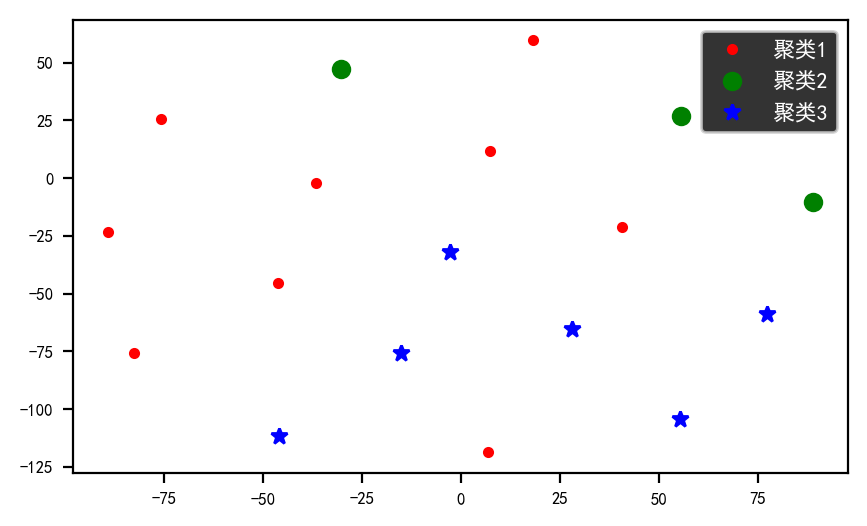

In [107]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(data_gj_jl1)
tsn = pd.DataFrame(tsne.embedding_,index = data_gj_jl1.index)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#绘图参数设置   
fig = plt.figure(dpi=200,figsize=(5,3)) #设置分辨率，画布大小
ax = fig.add_subplot(111)
#设置背景色
ax.patch.set_facecolor('white')#设置画布外颜色
fig.patch.set_facecolor('white')#设置画布内颜色
#设置画框的颜色
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

color_style = ['r.', 'go', 'b*']
for i in range(3):
    d = tsn[data_gj_jl1[u'分类值'] == i]
    plt.plot(d[0], d[1], color_style[i], label = '聚类' + str(i+1))
plt.legend(facecolor = 'black',fontsize = 8,loc = 1)
plt.tick_params(axis='x',colors='black',labelsize =6)
plt.tick_params(axis='y',colors='black',labelsize =6)
plt.show()

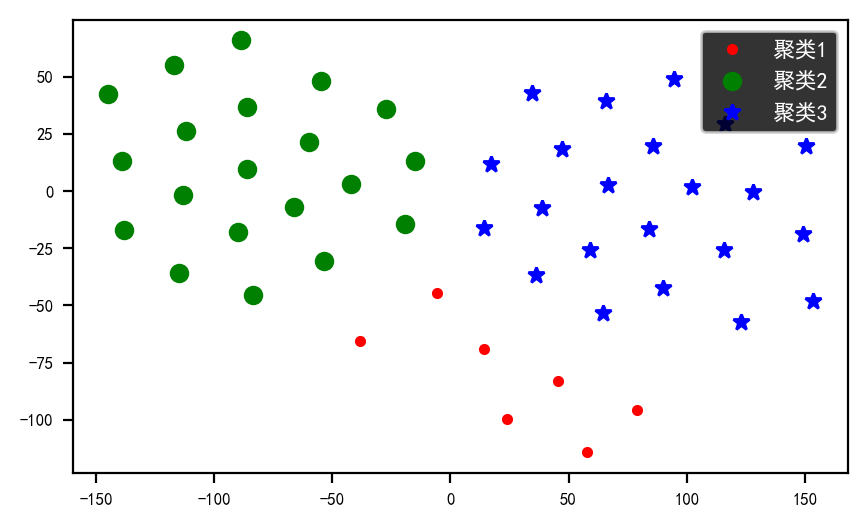

In [109]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(data_qb_jl1)
tsn = pd.DataFrame(tsne.embedding_,index = data_qb_jl1.index)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#绘图参数设置   
fig = plt.figure(dpi=200,figsize=(5,3)) #设置分辨率，画布大小
ax = fig.add_subplot(111)
#设置背景色
ax.patch.set_facecolor('white')#设置画布外颜色
fig.patch.set_facecolor('white')#设置画布内颜色
#设置画框的颜色
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

color_style = ['r.', 'go', 'b*']
for i in range(3):
    d = tsn[data_qb_jl1[u'分类值'] == i]
    plt.plot(d[0], d[1], color_style[i], label = '聚类' + str(i+1))
plt.legend(facecolor = 'black',fontsize = 8,loc = 1)
plt.tick_params(axis='x',colors='black',labelsize =6)
plt.tick_params(axis='y',colors='black',labelsize =6)
plt.show()

In [57]:
#data_gj_jl.to_excel("高钾聚类结果.xlsx")
#data_qb_jl.to_excel("铅钡聚类结果.xlsx")

In [222]:
d3_x = pd.read_excel("表单3.xlsx")
d3_x = d3_x.drop(d3_x.columns[0],axis = 1)
d3_x = d3_x.replace("无风化",0)
d3_x = d3_x.replace("风化",1)
d3_x = d3_x.fillna(0)
d3_y = model_rf.predict(d3_x)

In [224]:
#5%扰动测试
d3_x1 = d3_x.copy()
d3_x_t = d3_x.copy()
a = random.sample(range(0,7),1)
b = random.sample(range(0,14),3)
for i in a:
    for j in b:
        d3_x_t.iloc[a,b] = d3_x_t.iloc[a,b] * random.choice([0.95,1.05])
d3_y_t1 = model_rf.predict(d3_x_t)
d3_y_t1 = pd.DataFrame(d3_y_t1,columns=["5%扰动"])
d3_x1 = pd.concat([d3_x1,d3_y_t1],axis=1)

#10%扰动测试
d3_x_t = d3_x.copy()
a = random.sample(range(0,7),1)
b = random.sample(range(0,14),3)
for i in a:
    for j in b:
        d3_x_t.iloc[a,b] = d3_x_t.iloc[a,b] * random.choice([0.9,1.1])
d3_y_t2 = model_rf.predict(d3_x_t)
d3_y_t2 = pd.DataFrame(d3_y_t2,columns=["10%扰动"])
d3_x1 = pd.concat([d3_x1,d3_y_t2],axis=1)

#15%扰动测试
d3_x_t = d3_x.copy()
a = random.sample(range(0,7),1)
b = random.sample(range(0,14),3)
for i in a:
    for j in b:
        d3_x_t.iloc[a,b] = d3_x_t.iloc[a,b] * random.choice([0.85,1.15])
d3_y_t3 = model_rf.predict(d3_x_t)
d3_y_t3 = pd.DataFrame(d3_y_t3,columns=["10%扰动"])
d3_x1 = pd.concat([d3_x1,d3_y_t3],axis=1)

d3_x1.to_excel("../Demo3/表单3扰动测试结果.xlsx")

In [60]:
d3_ms = d3_x.describe()
#d3_ms.to_excel("表单3的数据探索性分析.xlsx")

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

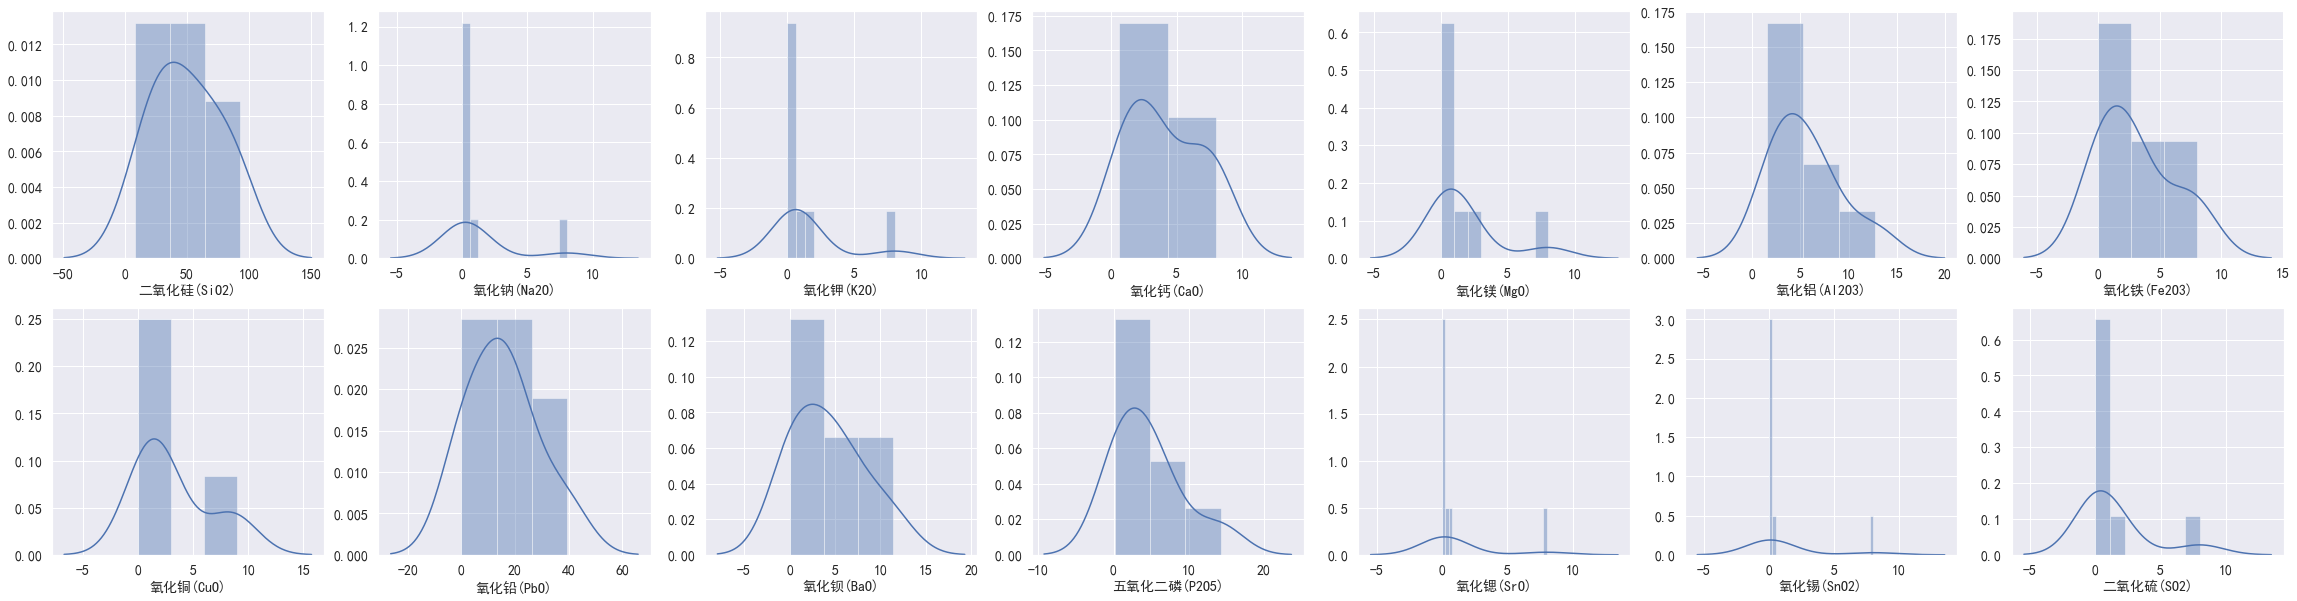

In [16]:
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题
plt.figure(figsize=(40,10))
for n,i in enumerate(["二氧化硅(SiO2)","氧化钠(Na2O)","氧化钾(K2O)","氧化钙(CaO)","氧化镁(MgO)","氧化铝(Al2O3)","氧化铁(Fe2O3)","氧化铜(CuO)","氧化铅(PbO)","氧化钡(BaO)","五氧化二磷(P2O5)","氧化锶(SrO)","氧化锡(SnO2)","二氧化硫(SO2)"]):
    plt.subplot(2,7,n+1)
#     plt.title(i)
    sns.distplot(d3_ms[i])
    plt.xlabel(i, fontsize = 14)
    plt.ylabel('')
    plt.tick_params(labelsize = 14)

In [83]:
d3_y = pd.DataFrame(d3_y,columns=["预测玻璃类型"])
d3_y = d3_y.replace(0,"高钾")
d3_y = d3_y.replace(1,"铅钡")
d3_x = pd.concat([d3_x,d3_y],axis =1)
#d3_x.to_excel("表单3预测结果.xlsx")